# Neural Nets - Autoencoder - MNIST

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [1]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier  #for grid search

Using TensorFlow backend.


### Data

In [7]:
#Read MNIST data
#Downloaded from Datacamp

#Read input
mnist = pd.read_csv('data_mnist_train.csv', sep=",",header = None)

47100000

In [9]:
#MNIST Analysis
mnist.shape

(60000, 785)

In [28]:
#X - 784
X = mnist.iloc[:10000,1:]

X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Split data
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.33, random_state=42)

X_test.shape

(3300, 784)

In [49]:
# Load noisy data
# 5 random numbers - may not actually be noisy

X_test_noise = X.iloc[[72,383,743,9823],:].values

X_test_noise

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Build Architecture

In [21]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with the original image as input
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many nodes as the image
autoencoder.add(Dense(784, activation="sigmoid"))

# Compile your model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Take a look at your model structure
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=10)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_multiclassmultilabel_model.hdf5', save_best_only=True)

### Fit Models

In [63]:
#Fit autoencoder

# Train
history_ae = autoencoder.fit(X_train, X_train, \
                    validation_data=(X_test, X_test),\
                    epochs = 100, \
                   callbacks=[monitor_val_acc,modelCheckpoint])


Train on 6700 samples, validate on 3300 samples
Epoch 1/100
6700/6700 [==============================] - 1s 182us/step - loss: -510.7577 - val_loss: -507.9559
Epoch 2/100
1152/6700 [====>.........................] - ETA: 0s - loss: -514.9688

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


6700/6700 [==============================] - 1s 161us/step - loss: -510.8512 - val_loss: -507.9396
Epoch 3/100
6700/6700 [==============================] - 1s 160us/step - loss: -510.9159 - val_loss: -507.9797
Epoch 4/100
6700/6700 [==============================] - 1s 169us/step - loss: -510.9750 - val_loss: -507.9639
Epoch 5/100
6700/6700 [==============================] - 1s 160us/step - loss: -511.0179 - val_loss: -507.9331
Epoch 6/100
6700/6700 [==============================] - 1s 160us/step - loss: -511.0512 - val_loss: -508.0159
Epoch 7/100
6700/6700 [==============================] - 1s 159us/step - loss: -511.0656 - val_loss: -508.0904
Epoch 8/100
6700/6700 [==============================] - 1s 163us/step - loss: -511.1088 - val_loss: -507.9992
Epoch 9/100
6700/6700 [==============================] - 1s 158us/step - loss: -511.1174 - val_loss: -508.0348
Epoch 10/100
6700/6700 [==============================] - 1s 161us/step - loss: -511.1119 - val_loss: -508.0106
Epoch 11/100

6700/6700 [==============================] - 1s 157us/step - loss: -510.9642 - val_loss: -506.9854
Epoch 76/100
6700/6700 [==============================] - 1s 157us/step - loss: -510.9622 - val_loss: -506.7269
Epoch 77/100
6700/6700 [==============================] - 1s 155us/step - loss: -510.9882 - val_loss: -506.4639
Epoch 78/100
6700/6700 [==============================] - 1s 156us/step - loss: -510.9179 - val_loss: -506.6320
Epoch 79/100
6700/6700 [==============================] - 1s 155us/step - loss: -510.9502 - val_loss: -506.0711
Epoch 80/100
6700/6700 [==============================] - 1s 158us/step - loss: -510.9067 - val_loss: -506.6516
Epoch 81/100
6700/6700 [==============================] - 1s 155us/step - loss: -510.8914 - val_loss: -506.3231
Epoch 82/100
6700/6700 [==============================] - 1s 155us/step - loss: -510.9221 - val_loss: -506.1974
Epoch 83/100
6700/6700 [==============================] - 1s 155us/step - loss: -510.9227 - val_loss: -506.2105
Epoch

### Evaluate Encoder and Illustrate

In [64]:
# Build your encoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Function for plotting encodings

def show_encodings(encoded_imgs):
    n = 5  # how many digits we will display
    original = X_test_noise
    #original = original[np.where(y_test == number)]
    #encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

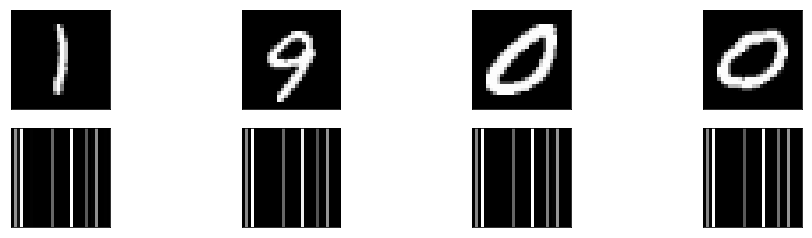

In [66]:
# Encode the images and show the encodings
preds = encoder.predict(X_test_noise)
show_encodings(preds)

### Evaluate Autoencoder and Illustrate

In [67]:
#Function for visualizing numbers

def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()

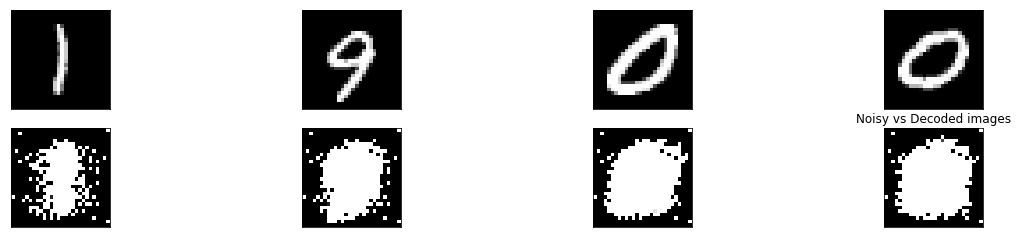

In [68]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)